# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look (Called Version 3)

# Fluxonium Design version 3.2: with this version the Ec is 1.26GHz. Check details.
# And LP's are 200nm.

## Design&LOM

### Preparations

In [4]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
               pocket_height='550um', pocket_width='900um',
               pad_height='110um',
        pad_radius='45um',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-15um'),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '400um', pad_height = '120um',
            pad_sep='75um', 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

In [4]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '110um',                      
  'pad_radius'        : '45um',                       
  'l_width'           : '1um',                        
  'l_length'          : '100um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'L_j'               : '34.38nH',                    
  'pocket_width'      : '900um',                      
  'pocket_hei

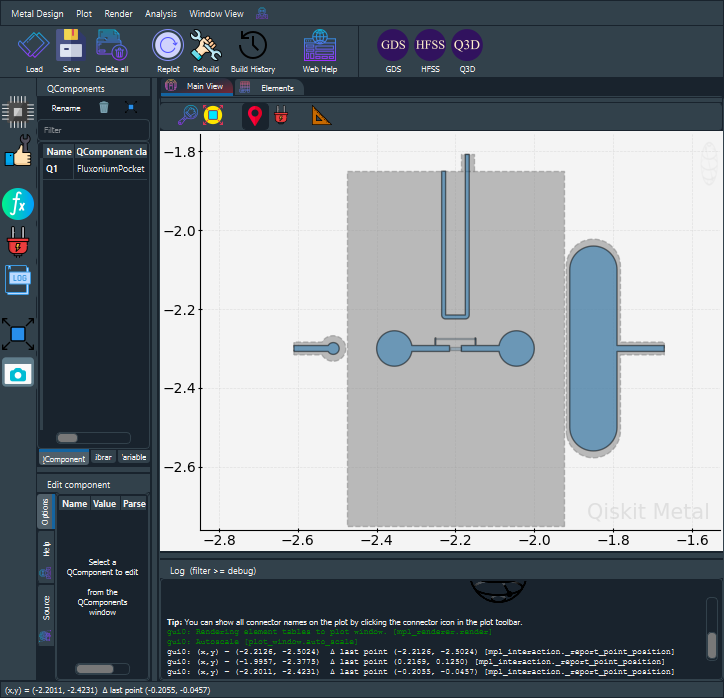

In [5]:
#Save screenshot as a .png formatted file.
gui.screenshot()

# LOM Fluxonium Qubits

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [6]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [7]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [8]:
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings

c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [9]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 12:08PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:08PM [load_ansys_project]: 	Opened Ansys App
INFO 12:08PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 12:08PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project38
INFO 12:08PM [connect_design]: No active design found (or error getting active design).
INFO 12:08PM [connect]: 	 Connected to project "Project38". No design detected
INFO 12:08PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 12:08PM [connect_setup]: 	No design setup detected.
WARNING 12:08PM [connect_setup]: 	Creating Q3D default setup.
INFO 12:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:08PM [analyze]: Analyzing setup Setup
INFO 12:12PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppDat

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.21918,-0.13406,-21.32251,-0.06271,-0.42617,-0.05749
flux_bias_line_Q1,-0.13406,58.97146,-45.75164,-4.12382,-4.13218,-2.70912
ground_main_plane,-21.32251,-45.75164,334.09362,-16.34156,-19.90358,-162.19483
pad_bot_Q1,-0.06271,-4.12382,-16.34156,29.55605,-2.84091,-5.00731
pad_top_Q1,-0.42617,-4.13218,-19.90358,-2.84091,29.55463,-1.07860
readout_padNline_Q1,-0.05749,-2.70912,-162.19483,-5.00731,-1.07860,173.66543


In [2]:
# capacitance with pocket-height=650um

Cpad_top = 19.903
Cpad_bot = 16.341
Creadout_bot = 5.007
Ccharge_top = 0.426
Cfluxpad_top = 4.132
Cfluxpad_bot = 4.123

C_pads = 2.840

C_top = Cpad_top + Ccharge_top + Cfluxpad_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('C_top:', C_top, 'fF')
print('C_bot:', C_bot, 'fF')
print('Total Capacitance:', Csigma, 'fF')

C_top: 24.461 fF
C_bot: 25.471 fF
Total Capacitance: 15.317892553873266 fF


In [5]:
e = 1.60217663e-19 #unit is C
hbar = 1.05457182e-34 #unit is m^2 kg / s

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 1264.5492267672646 MHz


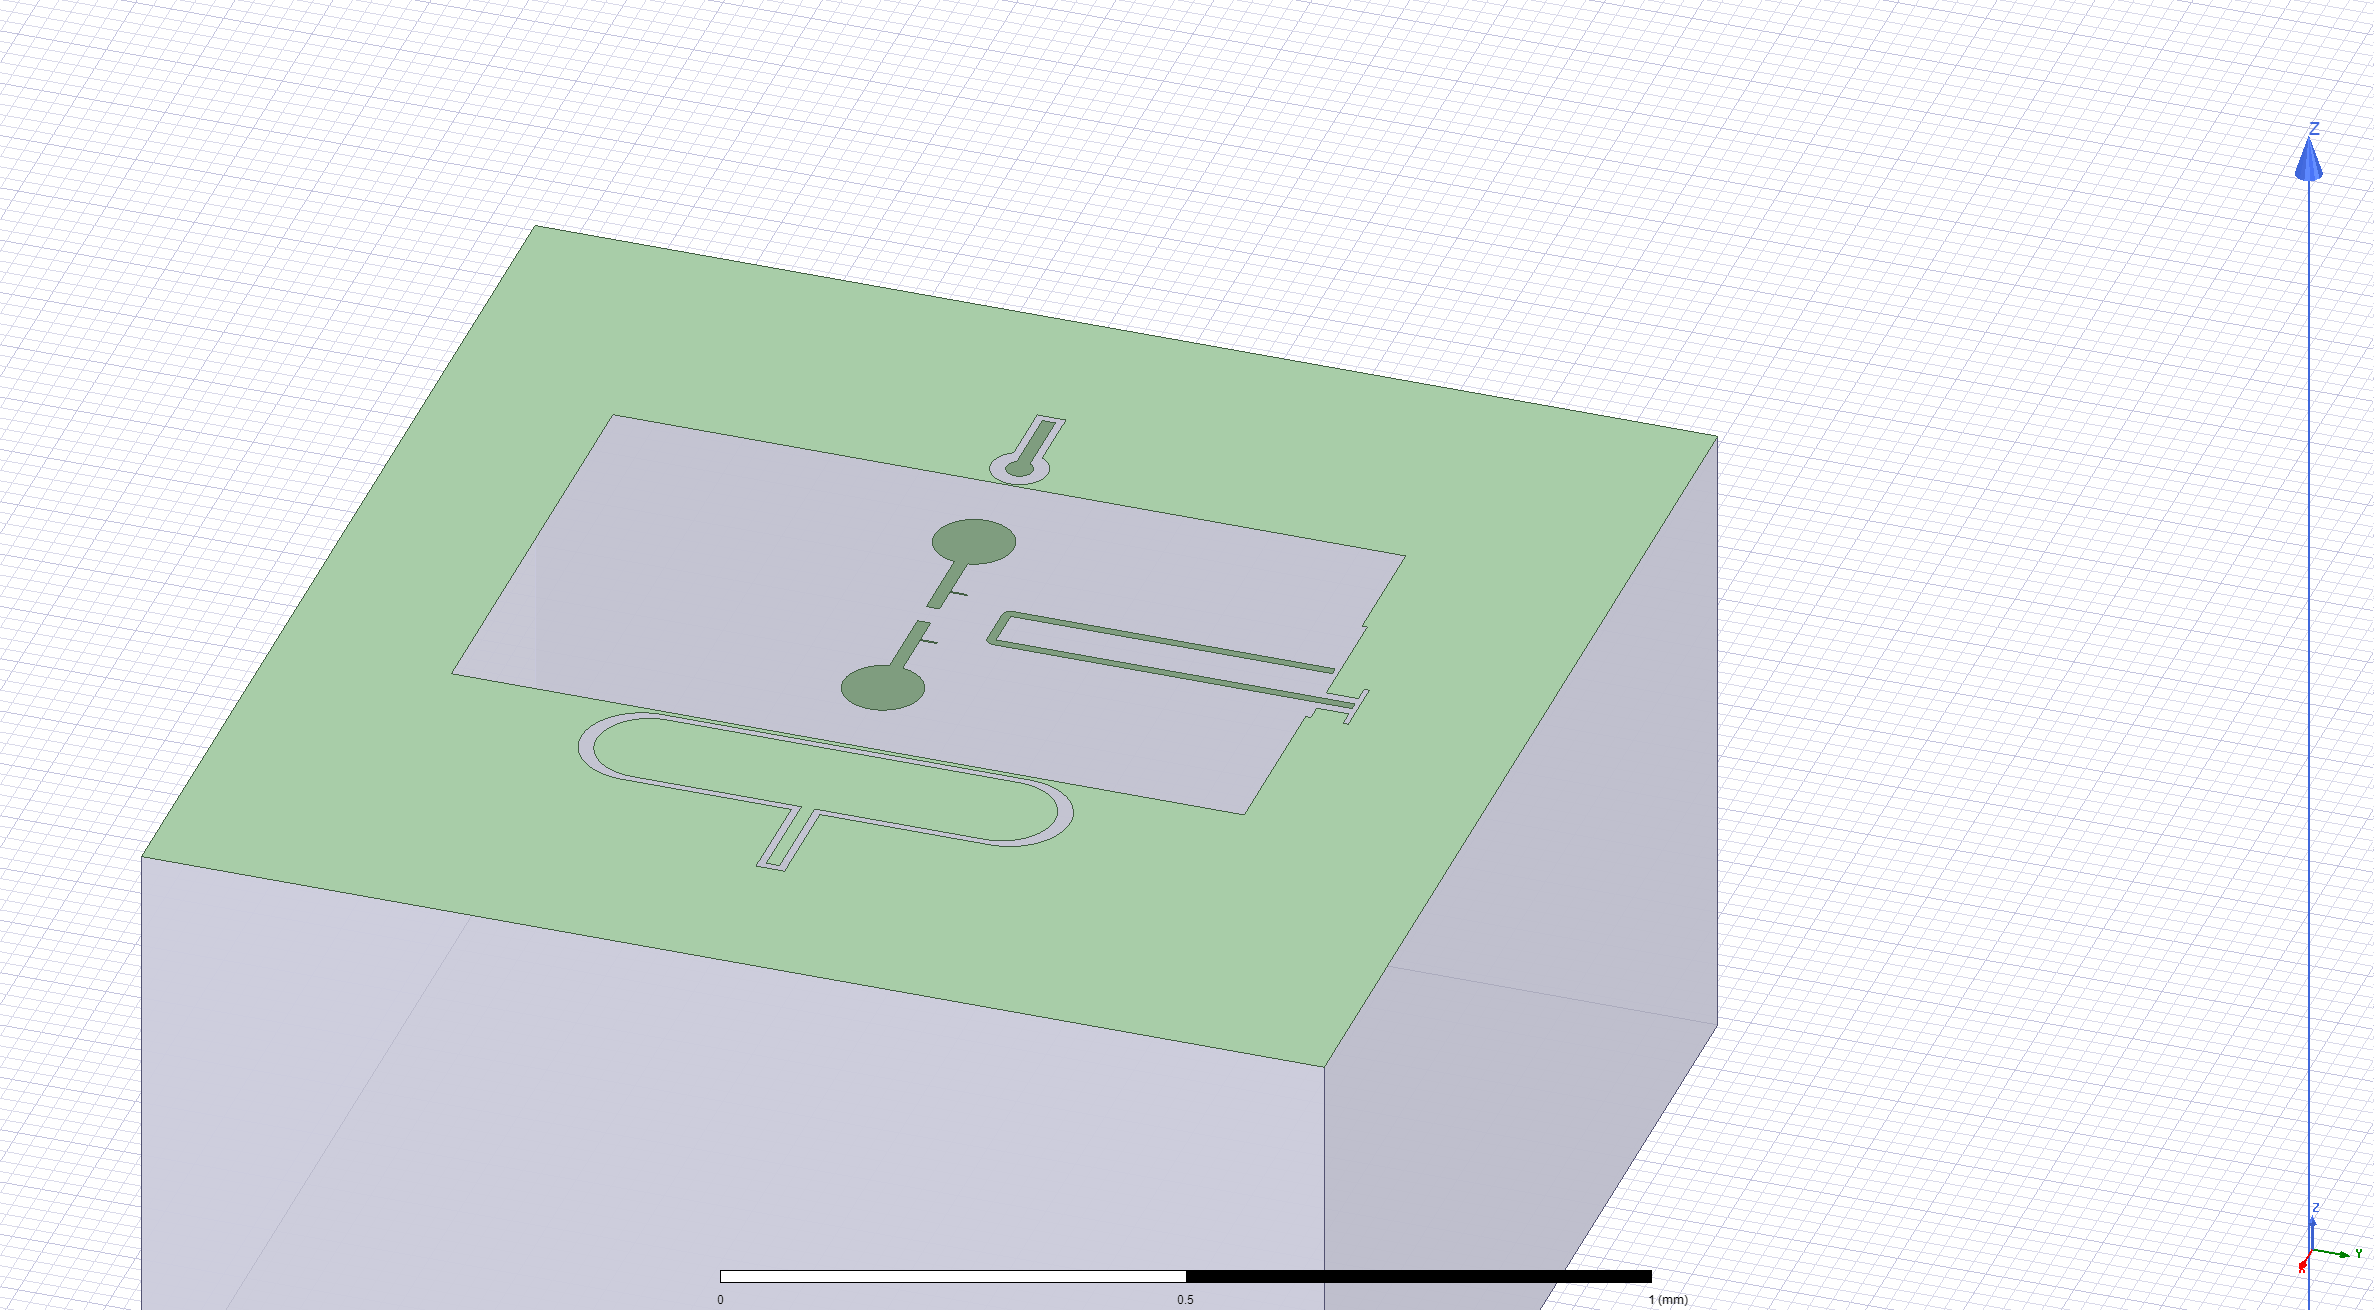

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [30]:
c1.sim.save_screenshot()

In [33]:
gui.main_window.close()

True